# Analytical solutions of the solute transport convection dispersion equation

## M. Vanclooster 28/4/18

In this notebook, we present some analytical solutions of the one dimensional convection dispersion equation.

\begin{equation}
R\frac{\partial C^r_l}{\partial t}+v\frac{\partial C^r_l}{\partial z}- D \frac{\partial^2 C^r_l}{\partial z^2}=0
\end{equation}

where $C^r_l$, the liquid phase solute resident concentration $(M L^{-3})$; v, the pore water velocity $(L T^{-1})$; D, the apparent hydrodynamic dispersion coefficient $(L^2 T^{-1})$; R, the solute retardation factor $(-)$; and t,z the space ($L$) and time ($T$), coordinate. When considering linear equilibrium solute adsorption between the liquid and the solid phase, then $R=1+\rho k_d / \theta$, with $\rho$ $(M L^{-3})$, the apparent soil bulk density; $k_d$ $(L^3 M^{-1})$, the equilibrium liquid solid distribution coefficient; and $\theta$ the soil volumetric moisture content. 

The convection dispersion equation can also be expressed in terms of solute flux concentrations: 

\begin{equation}
R\frac{\partial C^f}{\partial t}+v\frac{\partial C^f}{\partial z}- D \frac{\partial^2 C^f}{\partial z^2}=0
\end{equation}

with 

\begin{equation}
C^f=C^r_l-\frac{D}{v}\frac{\partial C^r_l}{\partial z}
\end{equation}

In this notebook we consider first and third type inlet boundary conditions. The first type formulates as follows:

\begin{equation}
C^r(0,t)=C_0(t)
\end{equation}

while the third type boundary conditions is as follows: 

\begin{equation}
vC^r_l(0;t)-D\frac{\partial C^r_l(0;t)}{\partial z}=v C_0(t)
\end{equation}

We consider the Dirac and Heaviside function for the $C_0(t)$ 

We consider the outlet boundary condition for a semi-infinite system

\begin{equation}
\frac{\partial C^r_l(\infty , t)}{\partial z} = 0
\end{equation}

that we simplify towards a Danckwerts boundary condition when we evaluate a finite system of length $L$: 

\begin{equation}
\frac{\partial C^r_l(L, t)}{\partial z} = 0
\end{equation}

In the solutions below, we consider a solute free soil columns as initial value, or: 

\begin{equation}
C^r_l(z, t)=0
\end{equation}

For a homogeneous soil subject to a Dirac pulse the analytical solution of the convection dispersion equation is

\begin{equation}
    C^k=\frac{m_B}{v}\Gamma^k
\end{equation}

with $k=f$ or $k=r$;  where $m_B$, the total mass added by unit area of soil $(M L^{-2})$; and  $\Gamma$ is the time dynamic kernel function $(T^{
-1})$, whose integral equals 1. In case of $\Gamma^f$, the kernel corresponds to the solute travel time probability density function. In case of solute adsorption, the kernel yields: 

\begin{equation}
    \Gamma_a(z,t)=\frac{1}{R}\Gamma_m\left(z,\frac{t}{R}\right)
\end{equation}

where $\Gamma_a$ the kernel for sorbed, and $\Gamma_m$ the kernel for the mobile species.

For a boundary value problem with Dirac (pulse) and Heaviside (step) input functions, the kernels are illustrated below. 

### Boundary value problem,  first type boundary condition in $C^r$, Dirac (pulse) input, solution for $C^r$.

In this case $C^r(0,t)=\delta (t)$;  the kernel for resident solutions yields: 

\begin{equation}
\Gamma^r=\frac{z}{2}\sqrt{\frac{R}{\pi D t^3}}exp\left(-\frac{(zR-vt)^2}{4DRt} \right)
\end{equation}

Let's evaluate this function and analyse impacts of the parameters D,R,v ont its solution

In [150]:
# Miscellaneous operating system interfaces
import os
# Python Numerical computating library
import numpy as np
# Python Scientifical computing library
import scipy as sc
# Python plotting library
from matplotlib import pyplot as plt
# Allowing plot inside the notebook
%matplotlib inline

We consider a soil column of 100 cm length,  we add 1 g at the soil surface. Since we consider a first type boundary condition, we consider that the 1 g of solute is immediately mixed with the soil surface at the soil solution. We consider that the solute is subsequently leached with a flow that induces a soil pore velocity of 1 cm / day. We consider a hydrodynamic dispersivity of 10 cm^2/day. We evaluate the breakthrough curve at 1 m depth as a function of time. 

In [151]:
#z=np.arange(0,100,1) # Distance in cm
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v = 1 #Pore water velocity (cm/day)
D = 10 # Hydrodynamic dispersivity (cm^2/day)
R = 1 # Retardation factor
mB = 1 # Added mass (g/cm2)

In [152]:
t1=z/2
t2=(R/(np.pi*D*t**3))**(0.5)
t3=(z*R-v*t)**2/(4*D*R*t)
t4=np.exp(-t3)
gamma_r=t1*t2*t4
C=mB/v*gamma_r

Text(0,0.5,'C (g/cm^3)')

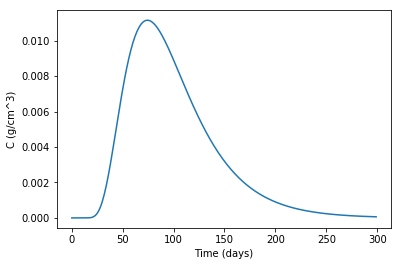

In [153]:
plt.plot(C)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')

With a solute pore water velocity of 1 cm/day, we expect that the peak of the solute applied at the soil surface at 1 m depth would appear after 100 days. We see that is nearly the case, but not exactly as the breakthrough curve (BTC) is not perfectly symmetric. This is a result of the boundary condition that is used, and the fact that we describe solute resident concentrations. The asymmetry of the BTC will be affected by the value of D.

Let's analyse the sensitivity of the apparent dispersion on this BTC. We evaluate the solution for 3 different values of D (0.1, 10 and 100 cm2/day).

Text(0,0.5,'C (g/cm^3)')

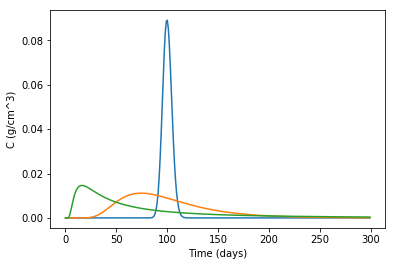

In [154]:
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v = 1 #Pore water velocity (cm/day)
D1 = .1 # Hydrodynamic dispersivity (cm^2/day)
D2 = 10
D3 = 100
R = 1 # Retardation factor
mB = 1 # Added mass (g/cm2)

t11=z/2
t21=(R/(np.pi*D1*t**3))**(0.5)
t31=(z*R-v*t)**2/(4*D1*R*t)
t41=np.exp(-t31)
gamma_r1=t11*t21*t41
C1=mB/v*gamma_r1

t12=z/2
t22=(R/(np.pi*D2*t**3))**(0.5)
t32=(z*R-v*t)**2/(4*D2*R*t)
t42=np.exp(-t32)
gamma_r2=t12*t22*t42
C2=mB/v*gamma_r2

t13=z/2
t23=(R/(np.pi*D3*t**3))**(0.5)
t33=(z*R-v*t)**2/(4*D3*R*t)
t43=np.exp(-t33)
gamma_r3=t13*t23*t43
C3=mB/v*gamma_r3

plt.plot(t,C1,t,C2,t,C3)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')

We see that the dispersion of the solute concentration and asymmetry increases when the apparent dispersion increases. 

Let's analyse the sensitivity of the pore water velocity  on the BTC. We consider a constant value for the apparent dispersion

Text(0,0.5,'C (g/cm^3)')

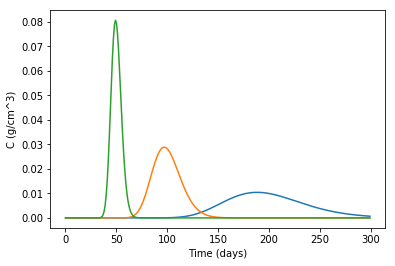

In [155]:
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v1 = 0.5 #Pore water velocity (cm/day)
v2 = 1. 
v3 = 2.
D = 1
R = 1 # Retardation factor
mB = 1 # Added mass (g/cm2)

t11=z/2
t21=(R/(np.pi*D*t**3))**(0.5)
t31=(z*R-v1*t)**2/(4*D*R*t)
t41=np.exp(-t31)
gamma_r1=t11*t21*t41
C1=mB/v*gamma_r1

t12=z/2
t22=(R/(np.pi*D*t**3))**(0.5)
t32=(z*R-v2*t)**2/(4*D*R*t)
t42=np.exp(-t32)
gamma_r2=t12*t22*t42
C2=mB/v*gamma_r2

t13=z/2
t23=(R/(np.pi*D*t**3))**(0.5)
t33=(z*R-v3*t)**2/(4*D*R*t)
t43=np.exp(-t33)
gamma_r3=t13*t23*t43
C3=mB/v*gamma_r3

plt.plot(t,C1,t,C2,t,C3)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')

Obviously, an increased pore water velocity pushes the solute faster through the soil profile. 

Finally, let's evualate the impact of adsorption on the BTC: 

Text(0,0.5,'C (g/cm^3)')

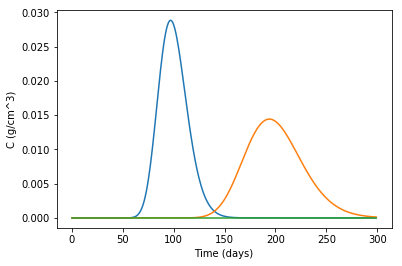

In [156]:
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v = 1 #Pore water velocity (cm/day)
D = 1
R1 = 1 # Retardation factor
R2 = 2
R3 = 10
mB = 1 # Added mass (g/cm2)

t11=z/2
t21=(R1/(np.pi*D*t**3))**(0.5)
t31=(z*R1-v*t)**2/(4*D*R1*t)
t41=np.exp(-t31)
gamma_r1=t11*t21*t41
C1=mB/v*gamma_r1

t12=z/2
t22=(R2/(np.pi*D*t**3))**(0.5)
t32=(z*R2-v*t)**2/(4*D*R2*t)
t42=np.exp(-t32)
gamma_r2=t12*t22*t42
C2=mB/v*gamma_r2

t13=z/2
t23=(R3/(np.pi*D*t**3))**(0.5)
t33=(z*R3-v*t)**2/(4*D*R3*t)
t43=np.exp(-t33)
gamma_r3=t13*t23*t43
C3=mB/v*gamma_r3

plt.plot(t,C1,t,C2,t,C3)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')

We see that the retardation factor has an impact on the apparent solute velocity.

### Boundary value problem,  third  type boundary condition in $C^r$, Dirac (pulse) input, solution for $C^f$

A third type boundary condition in $C^r$ corresponds to a first type boundary condition in $C^f$. Hence $C^f(0,t)=\delta(t)$

The kernel yielding the solution for the flux type concentration yields: 

\begin{equation}
\Gamma^f=\frac{z}{2}\sqrt{\frac{R}{\pi D t^3}}exp\left(-\frac{(zR-vt)^2}{4DRt} \right)
\end{equation}

This is exactly the same kernel as for the resident concentration subjected to a first type boundary condition in $C^r$. The same analysis as in previous section can be made. Yet the concentrations that are calculated now are flux type concentrations. 

This solution could be used to interpret the BTC as measured in the outflow of column tracer experiments. 


## Boundary value problem, third type boundary condition in $C^r$, Dirac (pulse) input, solution for $C^r$

As in previous solution, the third type boundary condition in $C^r$ corresponds to $C^f(0,t)=\delta(t)$. The kernel in this case yields: 

\begin{equation}
\Gamma^r=\frac{v}{\sqrt{\pi D R t}} exp \left(- \frac{(Rz-vt)^2}{4 D R t} \right)-\frac{v^2}{2 D R} exp \left(\frac{v z}{D} \right) erfc\left(\frac{Rz+vt}{\sqrt{4 D R t}}\right)
\end{equation}

In this solution, the complementary error function, $erfc(x) = 1 - erf(x)$ appears. Also the product between exponential function and the complementary error function appears. This product is often instable, and is therefore approximated by the $exf$ function (see van Genuchten and Alves, 1982).

This solution could be used if the time cours of resident concentrations are measured (e.g. by means of soil sampling, TDR monitoring, etc...).

In [157]:
def exf(a,b): #exf(a,b)=exp(a)erfc(b), with erfc(b)=1-erf(b)
    if (b <= 3):
        tau=1/(1+0.3275911*b)
        a1=0.2548296
        a2=-0.2844967
        a3=1.421414
        a4=-1.453152
        a5=1.061405
        exf=np.exp(a-b**2)*(a1*tau+a2*tau**2+a3*tau**3+a4*tau**4+a5*tau**5)     
        if (b < 0): exf=2*np.exp(a)-np.exp(a+b**2)*(a1*tau+a2*tau**2+a3*tau**3+a4*tau**4+a5*tau**5) 
    else:
        exf=(1/((np.pi)*0.5))*np.exp(a-b**2)/(b+0.5/(b+1./(b+1.5/(b+2./(b+2.5/(b+1.))))))
    return exf

In [158]:
#z=np.arange(0,100,1) # Distance in cm
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v = 1 #Pore water velocity (cm/day)
D = 10 # Hydrodynamic dispersivity (cm^2/day)
R = 1 # Retardation factor
mB = 1 # Added mass (g/cm2)

In [159]:
t1=v/((np.pi*D*R*t)**(0.5))
t2=(z*R-v*t)**2/(4*D*R*t)
t3=np.exp(-t2)
t4=v**2/(2*D*R)
t5=(v*z/D)
t6=(R*z+v*t)/((4*D*R*t)**(0.5))

In [160]:
t1=v/((np.pi*D*R*t)**(0.5))
t2=(z*R-v*t)**2/(4*D*R*t)
t3=np.exp(-t2)
t4=v**2/(2*D*R)
t5=(v*z/D)
t6=(R*z+v*t)/((4*D*R*t)**(0.5))
t7=len(t6)*[0]
for i in range(len(t6)):
    t7[i]=exf(t5,t6[i])
gamma_r=t1*t3-t4*np.asarray(t7)
C=mB/v*gamma_r

Text(0,0.5,'C (g/cm^3)')

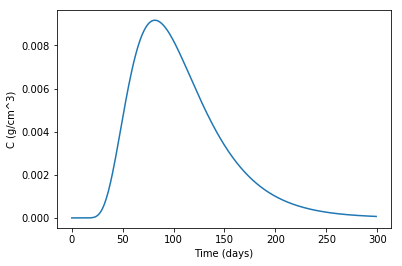

In [161]:
plt.plot(C)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')

As with the previous solutions, we can evaluate the sensitivity of the solute transport parameters, $v,D,R$ on the behaviour of the breakthrough curve

### Boundary value problem, third type boundary condition in $C^r$, Heaviside (step) function, solution for $C^f$

In this case the kernel yields
\begin{equation}
\Gamma^f=\frac{1}{2} erfc\left(\frac{R z - v t }{\sqrt{4 R D t }}\right)+\frac{1}{2} exp\left(\frac{v z}{D}\right) erfc\left(\frac{R z + v t}{\sqrt{4 R D t}}\right)
\end{equation}


In [162]:
#z=np.arange(0,100,1) # Distance in cm
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v = 1 #Pore water velocity (cm/day)
D = 10 # Hydrodynamic dispersivity (cm^2/day)
R = 1 # Retardation factor
mB = 1 # Added mass (g/cm2)

In [163]:
from scipy import special
t1=(z*R-v*t)/((4*D*R*t)**(0.5))
t2=sc.special.erfc(t1)
t3=(v*z/D)
t4=(R*z+v*t)/((4*D*R*t)**(0.5))
t5=len(t4)*[0]
for i in range(len(t4)):
    t5[i]=exf(t3,t4[i])
gamma_f=0.5*t2+0.5*np.asarray(t5)
C=mB/v*gamma_f

Text(0,0.5,'C (g/cm^3)')

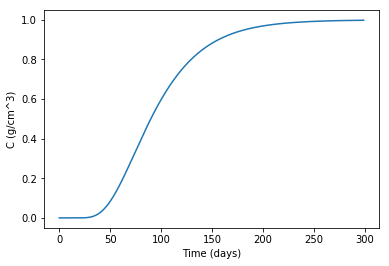

In [164]:
plt.plot(C)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')

### Boundary value problem, third type boundary condition in $C^r$, Heaviside (step) function, solution for $C^r$

In this case the kernel yields: 

\begin{equation}
    \Gamma^r=\frac{1}{2} erfc\left(\frac{Rz - vt}{\sqrt{4 D R t}}\right)
    +\sqrt{\frac{v^2 t}{\pi R D}} exp\left(-\frac{(R z - vt)^2}{4 D t}\right)-\frac{1}{2}\left(1+\frac{v z }{D} + \frac{v^2 t }{D R}\right) exp\left(\frac{v z}{D} \right) erfc\left(\frac{R z + vt}{\sqrt{4 D R t}} \right)
\end{equation}

In [165]:
#z=np.arange(0,100,1) # Distance in cm
z=100 # Evaluation distance in cm
t=np.arange(0.1,300,1) # Time in days

v = 1 #Pore water velocity (cm/day)
D = 10 # Hydrodynamic dispersivity (cm^2/day)
R = 1 # Retardation factor
mB = 1 # Added mass (g/cm2)

In [166]:
from scipy import special
t1=(z*R-v*t)/((4*D*R*t)**(0.5))
t2=sc.special.erfc(t1)
t3=((v**2*t)/(np.pi*R*D))**(0.5)
t4=(z*R-v*t)**2/(4*D*t)
t5=np.exp(-t4)
t6=(1+(v*z/D)+(v**2*t/(D*R)))
t7=(v*z/D)
t8=(z*R+v*t)/((4*D*R*t)**(0.5))
t9=len(t8)*[0]
for i in range(len(t8)):
    t9[i]=exf(t7,t8[i])
gamma_f=0.5*t2+t3*t5-0.5*t6*np.asarray(t9)
C=mB/v*gamma_f

Text(0,0.5,'C (g/cm^3)')

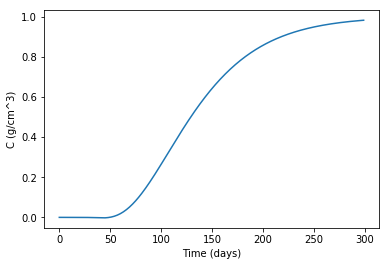

In [167]:
plt.plot(C)
plt.xlabel('Time (days)')
plt.ylabel('C (g/cm^3)')